# An analysis of the influence of Black Southern Churches on the Southern Black Community

## Background:

Documenting the American South is one of the longest running digital publishing initiatives at the University of North Carolina. It was designed to give researchers digital access to some of the library’s unique collections in the form of high quality page scans as well as structured, corrected and machine readable text. (https://docsouth.unc.edu/docsouthdata/)

## Goal: 

Analyze rhetoric of the Black Southern Church in the American South and it's effects on documents written by self emancipated and previously enslaved Black people.

## Research question:

Are there any measurable similaries between the themes of documents from Southern Black churches and the documents from self-emancipated and freed Black people? 

## Approach:

[Documenting The American South](https://docsouth.unc.edu/) is one of the longest running efforts by the University of North Carolina to collect, digitize, and publish documents from self-emancipated and freed Black people. Using [DocSouth Data](https://docsouth.unc.edu/docsouthdata/) and data from the [Religious Text Content Guide](https://docsouth.unc.edu/neh/religiouscontent.html), analyze the correlation between autobiographies, biographies, church documents, sermons, histories, encyclopedias, and other published materials from Southern Black churches and the narratives of slaves in regards to religion.

Proposed analysis:

- Evaluate language of both data sets
- Evaluate themes of both data sets
- Using data from the [Religious Text Content Guide](https://docsouth.unc.edu/neh/religiouscontent.html), develop a theme predictor for texts
- Evaluate how much (if any) thematic overlap there is between religious texts and slave narratives

## Repo contents:
- [SouthernBlackChurchRhetoric](https://github.com/jaded-gloryy/doc-south-analysis/blob/main/SouthernBlackChurchRhetoric.ipynb) contains all analysis.
- [Scrape_website](https://github.com/jaded-gloryy/doc-south-analysis/blob/main/scrape_website.py) contains the functions used to obtain [Religious Text Content Guide](https://docsouth.unc.edu/neh/religiouscontent.html) data.
- [Utils](https://github.com/jaded-gloryy/doc-south-analysis/blob/main/utils.py) contains generic functions for parsing an html document.


data: 
https://www.kaggle.com/datasets/docsouth-data/the-church-in-the-southern-black-community
https://docsouth.unc.edu/neh/religiouscontent.html

note from kaggle compiler:
If you make use of this data, considering letting the holder of the original collection know how you are using the data and if you have any suggestions for making it even more useful. Send any feedback to wilsonlibrary@unc.edu.

### Data preprocessing

##### Get content guide data

Data was scraped from [religious text content guide data](https://docsouth.unc.edu/neh/religiouscontent.html).

In [51]:
# import data scraped from the web and turn it into a df
import pandas as pd
from pandas import DataFrame as df
from scrape_website import scrape_data, custom_filter, build_dict
url = "https://docsouth.unc.edu/neh/religiouscontent.html"
tag_list = scrape_data(url=url, filter=custom_filter)
data_dict = build_dict(tag_list=tag_list)
content_guide_data = df.from_dict(data_dict)
content_guide_data = content_guide_data.dropna(subset="page_link")
content_guide_data

,theme,alt_theme,author,title,year,page_numbers,page_link
0,Baptism,None,"Brown, Henry Box, and Charles Stearn",Narrative of Henry Box Brown,1849,23-24,/neh/boxbrown/boxbrown.html#p23
1,Baptism,None,"Brown, Josephine",Biography of an American Bondman,"1856, c1855",23-24,/neh/brownj/brownj.html#brownj23
2,Baptism,None,"Brown, Rebecca Warren[?]",Memoir of Mrs. Chloe Spear,1832,38-40,/neh/brownrw/brownrw.html#spear38
3,Baptism,None,"Henry, George",Life of George Henry,1894,42-43,/neh/henryg/henryg.html#henry42
4,Baptism,None,"Johnson, Thomas Lewis",Twenty-Eight Years a Slave,1909,17,/neh/johnson1/johnson.html#john17
...,...,...,...,...,...,...,...
388,Spirituals,None,"Capehart, L. C.",Reminiscences of Isaac and Sukey,1907,11,/neh/capehart/capehart.html#cape11
389,Spirituals,None,"Foster, G. L. (Gustavus Lemuel)",Uncle Johnson,"Foster, G. L. (Gustavus Lemuel",70-71,/neh/foster/foster.html#foster70
390,Spirituals,None,"Jones, Friday",Days of Bondage,1883,17-18,/neh/fjones/jones.html#jones17
391,Spirituals,None,"Pickard, Kate E. R.",The Kidnapped and the Ransomed,1856,179-180,/neh/pickard/pickard.html#pickard179


In [52]:
# there's a typo in this table. Replace title with appropriate year
non_num_yrs = content_guide_data["year"].str.isnumeric() == False
content_guide_data[non_num_yrs]

change_dict = {
        "Offley, G. W. (Greensbury Washington":"1859",
        "Latta, M. L. (Morgan London":"1903",
        "Jamison, M. F. (Monroe Franklin":"1912",
        "Brinch, Boyrereau and Prentiss, Benjamin F. (Benjamin Franklin":"1817",
        "Foster, G. L. (Gustavus Lemuel":"1860",
        "Bradford, Sarah H. (Sarah Hopkins":"1869",
        "Green, J. D. (Jacob D.":"1864",
        "E. M. W. (Elizabeth Merwin Wickham":"1869"
    }

# replace years
content_guide_data["year"] = content_guide_data["year"].replace(change_dict)


In [53]:
# replace remaining non-numeric years
# find years "publ.?" where title says "Experience and Personal Narrative of Uncle Tom." and replace with "1854"
publ_string = content_guide_data["year"].str.contains("publ.?")
string_1854 = "Experience and Personal Narrative of Uncle Tom"
find_1854 = content_guide_data["title"].str.contains(string_1854)
publ_1854 = content_guide_data[publ_string & find_1854]

# update values that should say 1854
content_guide_data["year"].loc[publ_1854.index] = "1854"

# find years "publ.?" where title says "Sketch of the Life of Mr. Lewis Charlton" and replace with "1870"
string_1870 = "Sketch of the Life of Mr. Lewis Charlton"
find_1870 = content_guide_data["title"].str.contains(string_1870)
publ_1870 = content_guide_data[publ_string & find_1870]

# content_guide_data_updated = content_guide_data[publ_string & find_1870].replace("publ.?","1870")
content_guide_data["year"].loc[publ_1870.index] = "1870"


#### Get text data from the documents in the content guide

##### The next 3 cells contain code to grab text from specific pages of each document in the content_guide_data.

The output of the code below is saved in thematic_text.txt. Since this only needs to be performed once, the code is commented out.

In [152]:
# get text files from links in page column
from scrape_website import combine_url,get_pages_from_url, get_page_list
base_url = "https://docsouth.unc.edu"
#replace roman numeral ranges and typo from website
content_guide_data = content_guide_data.replace({"page_numbers":{"iv-viii":"iv,v,vi,vii,viii", "vi-viii":"vi,vii,viii","28-19":"28-29"}})
page_numbers = content_guide_data["page_numbers"]
page_urls = content_guide_data["page_link"]

full_links = combine_url(base_url=base_url, specific_url=list(page_urls))
page_num_list = list(page_numbers)

# get a list of pages
page_ranges = []
for page in page_num_list:
    page_ranges.append(get_page_list(page))

thematic_texts = get_pages_from_url(urls=full_links, pages=page_ranges)

with open('thematic_text.txt', 'w') as f:
    for line in thematic_texts:
        f.write(line)
        f.write("\n")

theme                 Christmas, slaves' celebration
alt_theme                                       None
author                               Fedric, Francis
title           Slave Life in Virginia and Kentucky 
year                                            1863
page_numbers                                   28-29
page_link             /neh/fedric/fedric.html#fred28
Name: 45, dtype: object


The output of the code below is saved in cleaned_thematic_text.txt. Since this only needs to be performed once, the code is commented out.

In [55]:
# clean up and save output to a txt for future use
from scrape_website import clean_up_text
cleaned_thematic_texts = []
for text in thematic_texts:
    new_text = clean_up_text(text)
    cleaned_thematic_texts.append(new_text)

# save cleaned text to a txt file
with open('cleaned_thematic_text.txt', 'w') as f:
    for line in cleaned_thematic_texts:
        f.write(line)
        f.write("\n")
cleaned_thematic_texts

In [56]:
# reading in data from txt
ctt = open("cleaned_thematic_text.txt", "r")
data = ctt.read()
  
# replacing end splitting the text 
# when newline ('\n') is seen.
data_into_list = data.split("\n")
len(data_into_list)
#removing the last empty line
thematic_texts = data_into_list[:388]
ctt.close()


#### Read in table of contents data

The following code prepares DocSouth general data for analysis.

In [57]:
import pandas as pd
# from pandas import DataFrame as df
from  config import CONFIG

#read in toc table
#replace .xml with .txt for filenames
# remove anything in [] from txt files
toc_data = CONFIG["TOC_FILEPATH"]
contents_table = pd.read_csv(toc_data)
txt_filename = contents_table.Filename.str.replace(".xml", ".txt")

# get every entry, drop .xml and replace it with .txt
contents_table["txt_filename"] = txt_filename

# make new table
specified_content_cols = ["txt_filename", "Date", "Author", "Title"]
content_ref_table = contents_table[specified_content_cols]

/var/folders/d4/7ym0w0x148n9lkl4zkqgqq9c0000gp/T/ipykernel_22214/231671236.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  txt_filename = contents_table.Filename.str.replace(".xml", ".txt")


In [58]:
# rename date column and lower other col names
content_ref_table = content_ref_table.rename(columns={"Date":"year"})
content_ref_table.columns = content_ref_table.columns.str.lower()
content_ref_table

,txt_filename,year,author,title
0,church-ridgel-ridgel.txt,1896,Alfred Lee Ridgel,Africa and African Methodism
1,church-bowen-bowen.txt,1896,J. W. E. Bowen,Africa and the American Negro: Addresses and P...
2,neh-johnsontl-johnsontl.txt,1892,Thomas L. Johnson,Africa for Christ. Twenty-Eight Years a Slave
3,church-turneral-turner.txt,1893,Henry McNeal Turner,African Letters
4,church-gaineswj-gaines.txt,1890,W. J. Gaines,"African Methodism in the South; or, Twenty-Fiv..."
...,...,...,...,...
139,church-wheeler-wheeler.txt,1906,B. F. Wheeler,The Varick Family
140,church-cooper-cooper.txt,1892,Anna J. Cooper,A Voice from the South
141,neh-wilkerson-wilkerson.txt,1861,Major James Wilkerson,Wilkerson's History of His Travels &amp; Labor...
142,church-brawley-brawley.txt,c1919,Benjamin Griffith Brawley,Women of Achievement: Written for the Fireside...


### Thematic text analysis

In [59]:
# tokenize texts
# combine relevant content data with texts
# from pandas import DataFrame as df
thematic_data_df = content_guide_data[["theme","title","year"]].reset_index(drop=True)
them_df= df(thematic_texts, columns=["text"])
new_df = pd.concat([thematic_data_df,them_df],axis=1)
new_df

,theme,title,year,text
0,Baptism,Narrative of Henry Box Brown,1849,slavery is dissolved. The slave's wife is ...
1,Baptism,Biography of an American Bondman,"1856, c1855","Haskell, the overseer, experien..."
2,Baptism,Memoir of Mrs. Chloe Spear,1832,"herself entirely alone, she fell on her ..."
3,Baptism,Life of George Henry,1894,to bind all that called upon the name of...
4,Baptism,Twenty-Eight Years a Slave,1909,But now I thought that if my master would...
...,...,...,...,...
383,Spirituals,Reminiscences of Isaac and Sukey,1907,Sukey Bat Moore on the Art of Flying. ...
384,Spirituals,Uncle Johnson,1860,charm. They would come forth as spontane...
385,Spirituals,Days of Bondage,1883,on Tuesday morning--this was Sunday nigh...
386,Spirituals,The Kidnapped and the Ransomed,1856,"you to go to the gin-house, and get Ann ..."


In [60]:
# themes pre-analysis
themes = new_df["theme"]
themes.value_counts()

Religious practice                                                                                          48
Religious experience, positive                                                                              32
Literacy:  includes learning to read and write, further education, and experiences related to literacy      31
Conversion experience                                                                                       28
Spirituals                                                                                                  24
Sabbath, slaves' observance                                                                                 23
Bible                                                                                                       21
Condemnation of masters                                                                                     19
Marriage                                                                                                    19
M

<Axes: title={'center': 'Number of samples for each Theme'}, xlabel='Samples', ylabel='Theme'>

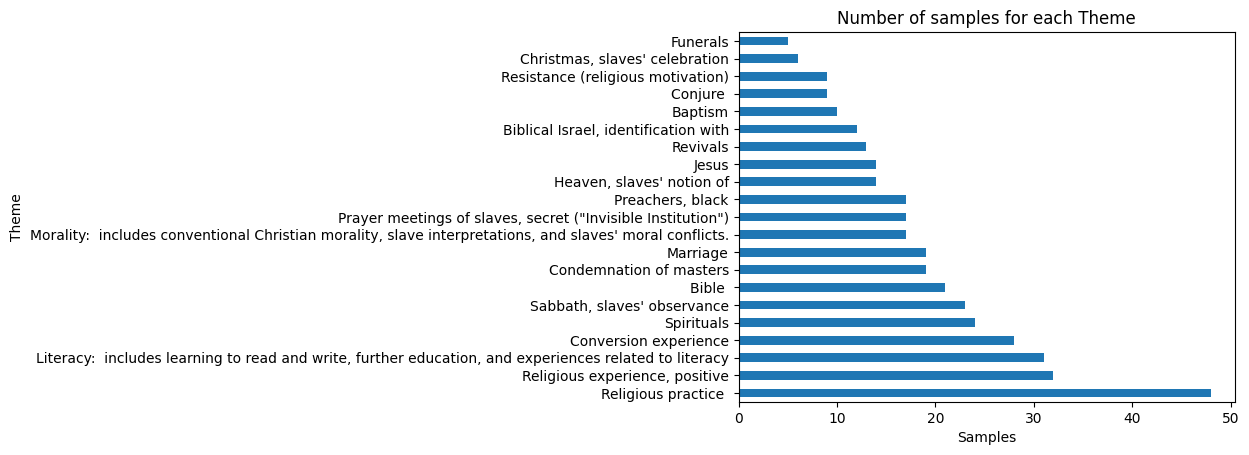

In [61]:
#get hist of themes
themes.value_counts().plot.barh(ylabel='Theme', xlabel='Samples', title="Number of samples for each Theme")

In [62]:
# thematic_texts

In [63]:
# import nltk
# nltk.download('stopwords')

In [64]:
# gather all texts by their theme
from nlp_utils import list_to_str

texts_by_theme = []
theme_names = list(themes.unique())
for theme in theme_names:

    theme_mask =  new_df["theme"] == theme 
    text_to_combine = new_df[theme_mask]["text"].values
    new_text = list_to_str(text_to_combine)
    texts_by_theme.append(new_text)

len(texts_by_theme)

21

In [65]:
# tokenize texts
from nlp_utils import lemmatize_words, remove_stopwords

extra_stopwords = ["" , " ", "\n", "'s"]
tokenized_themetxt=[]

for text in texts_by_theme:
    base_text = remove_stopwords(text, extra_stopwords)
    lemmatized = lemmatize_words(base_text)
    tokenized_themetxt.append(lemmatized)

len(tokenized_themetxt)

21

In [66]:
# clean up theme names for readability
clear_theme_names = []

for name in theme_names:

    is_literacy = True if name.find("Literacy") != -1 else False
    is_morality = True if name.find("Morality") != -1 else False
    is_prayer = True if name.find("Prayer meetings") != -1 else False

    if is_literacy:
        clear_theme_names.append("Literacy")
    elif is_morality:
        clear_theme_names.append("Morality")
    elif is_prayer:
        clear_theme_names.append("Prayer")
    else:
        clear_theme_names.append(name)
clear_theme_names

['Baptism',
 'Bible ',
 'Biblical Israel, identification with',
 "Christmas, slaves' celebration",
 'Condemnation of masters',
 'Conjure ',
 'Conversion experience',
 'Funerals',
 "Heaven, slaves' notion of",
 'Jesus',
 'Literacy',
 'Marriage',
 'Morality',
 'Prayer',
 'Preachers, black',
 'Religious experience, positive',
 'Religious practice ',
 'Resistance (religious motivation)',
 'Revivals',
 "Sabbath, slaves' observance",
 'Spirituals']

In [67]:
# plot len of words
import matplotlib.pyplot as plt

#x = theme, y = len(tokenized text)
num_words = [len(word_list) for word_list in tokenized_themetxt]
fig, ax = plt.subplots()
ax.barh(clear_theme_names,num_words)
ax.set_title("Number of words in each Theme")
ax.set_ylabel("Theme")
ax.set_xlabel("Word count")
plt.show()

In [68]:
# get all the word counts
from nlp_utils import get_word_counts
thematic_word_counts = []
for text in tokenized_themetxt:
    word_count = get_word_counts(text)
    thematic_word_counts.append(word_count)


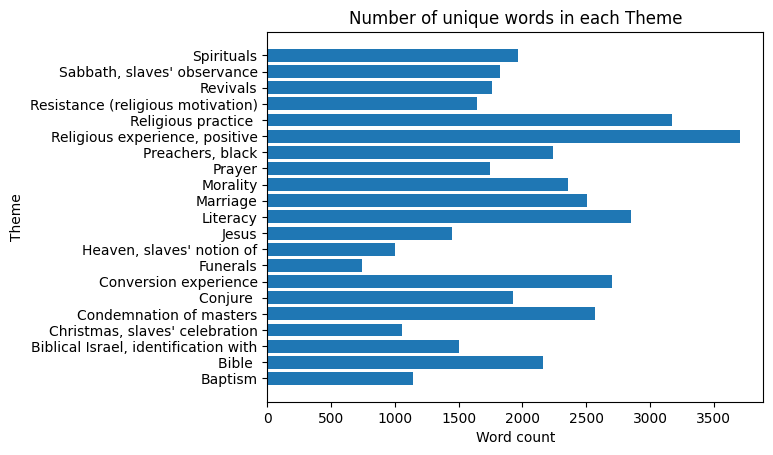

In [108]:
# import matplotlib.pyplot as plt
# # plot len of unique words
# #x = theme, y = len(unique tokenized text)
# unique_words = []
# for each in thematic_word_counts:
#     unique_words.append(list(each.keys()))

# num_unique_words = [len(words) for words in unique_words]
# fig, ax = plt.subplots()
# ax.barh(clear_theme_names,num_unique_words)
# ax.set_title("Number of unique words in each Theme")
# ax.set_ylabel("Theme")
# ax.set_xlabel("Word count")
# # plt.xticks(rotation = 90)
# plt.show()

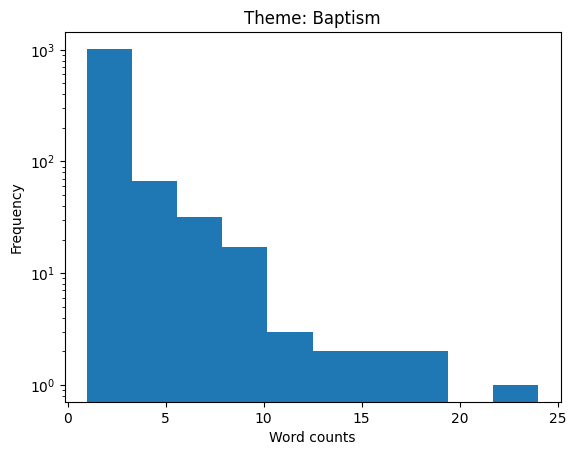

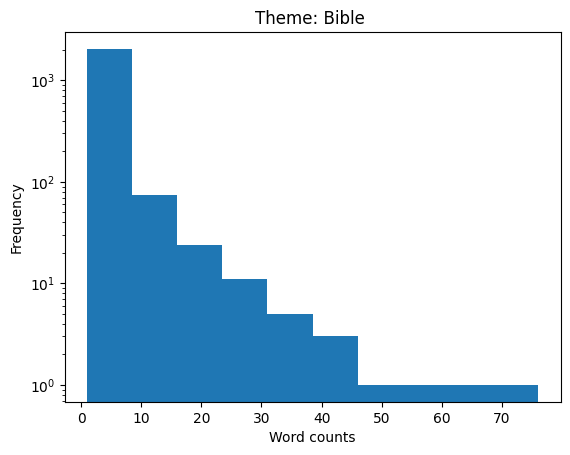

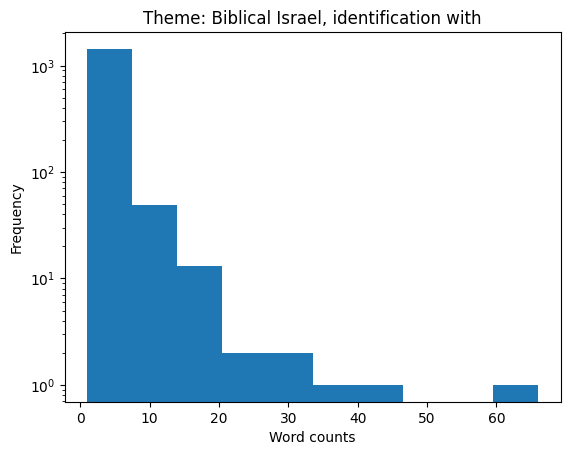

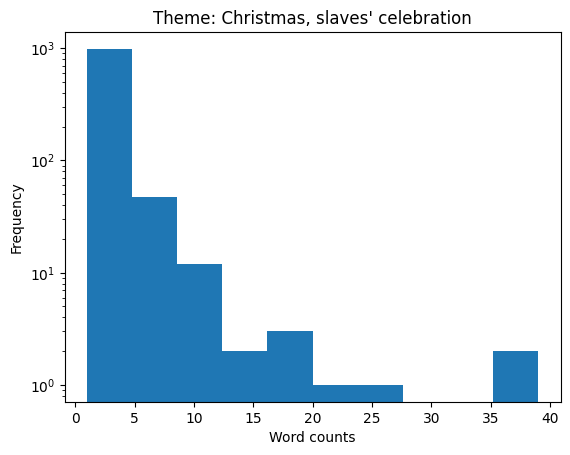

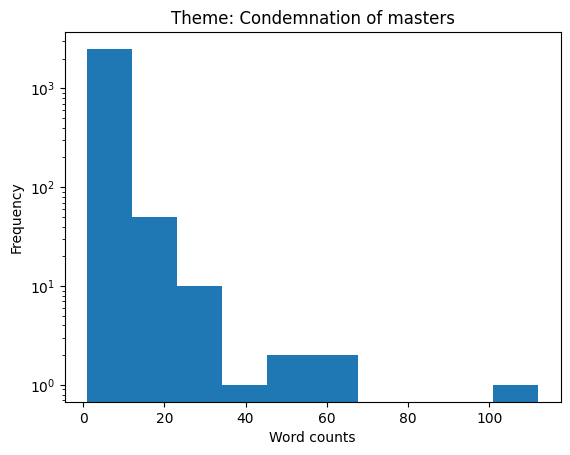

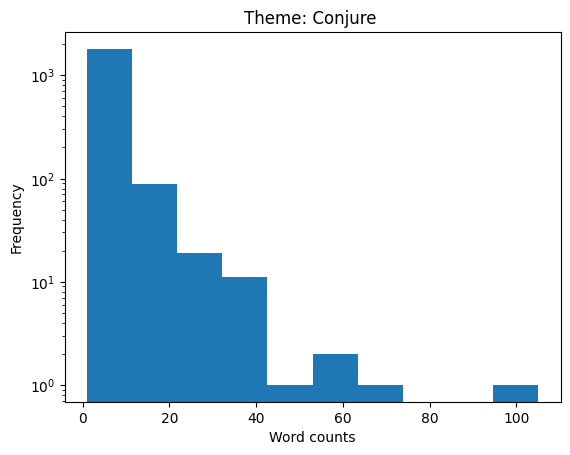

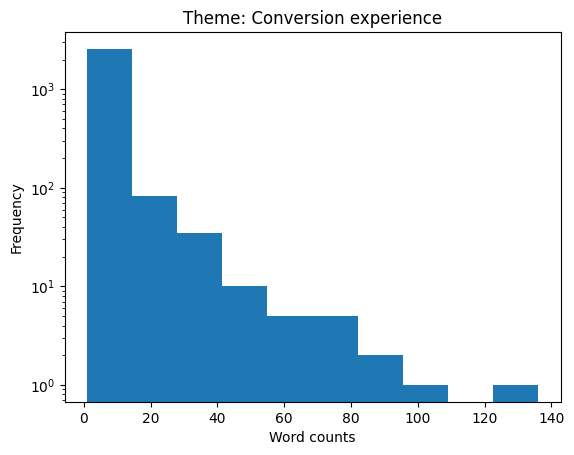

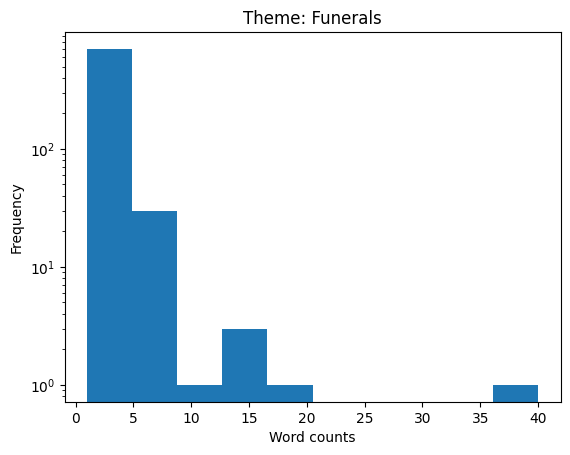

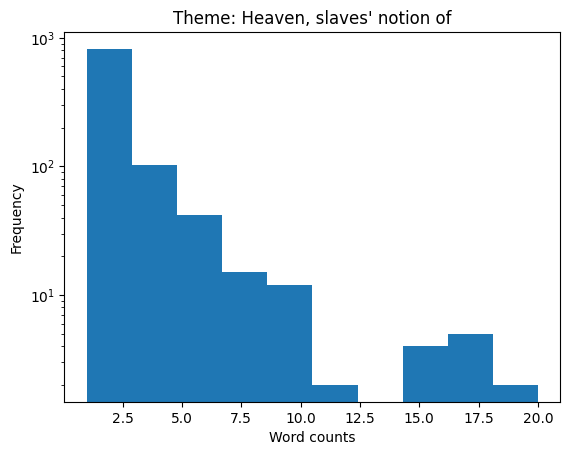

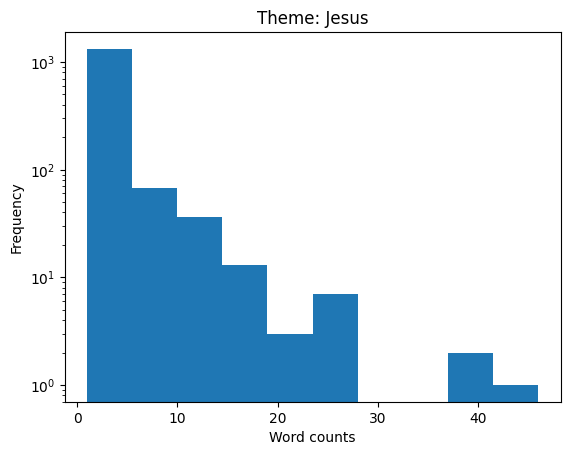

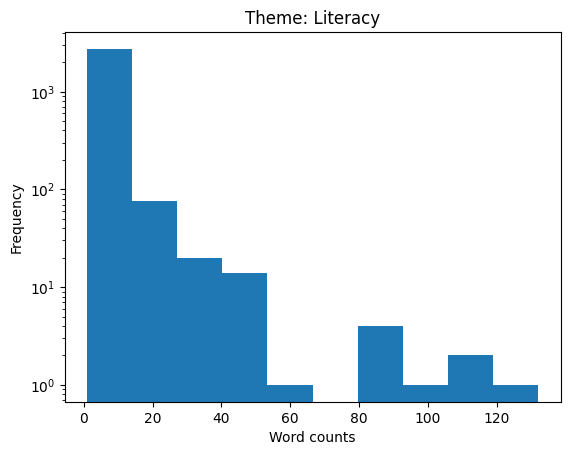

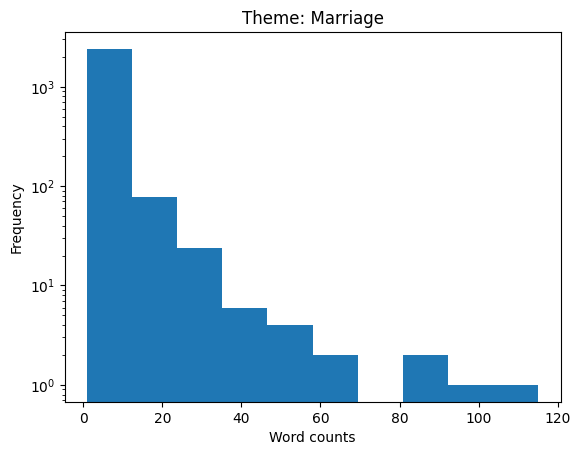

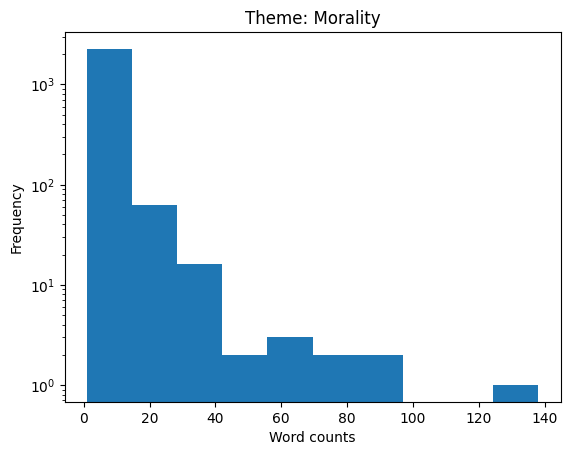

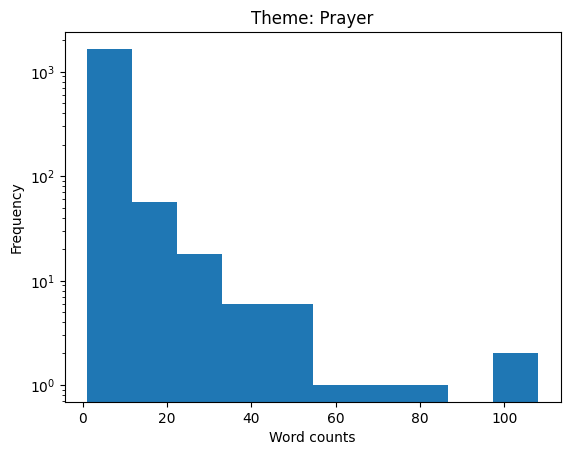

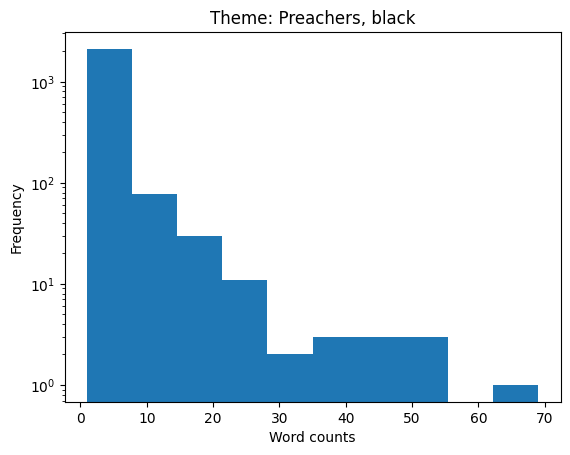

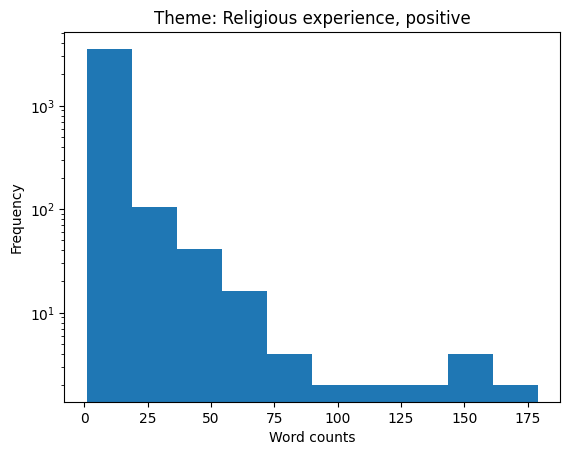

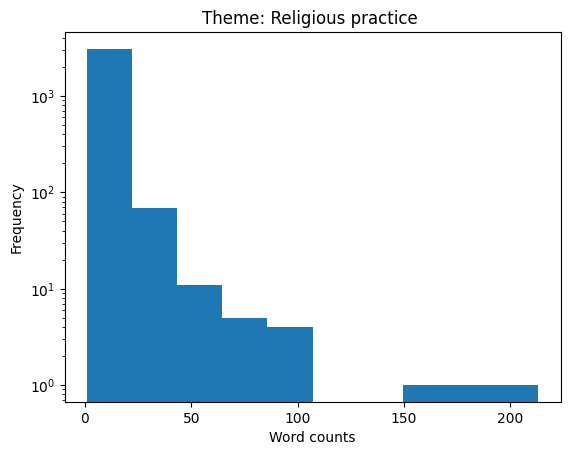

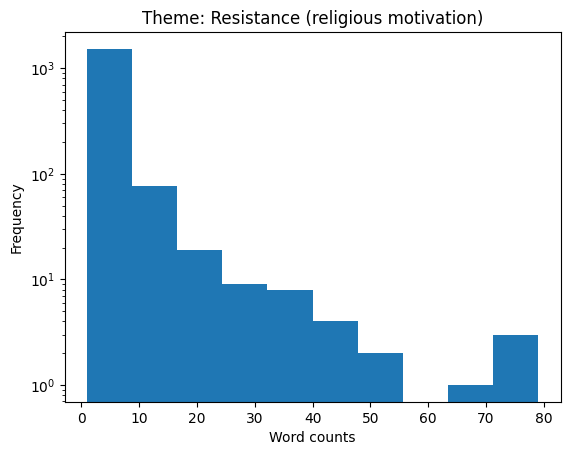

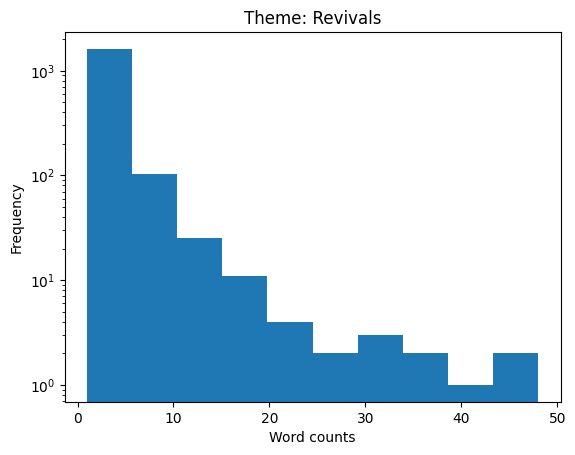

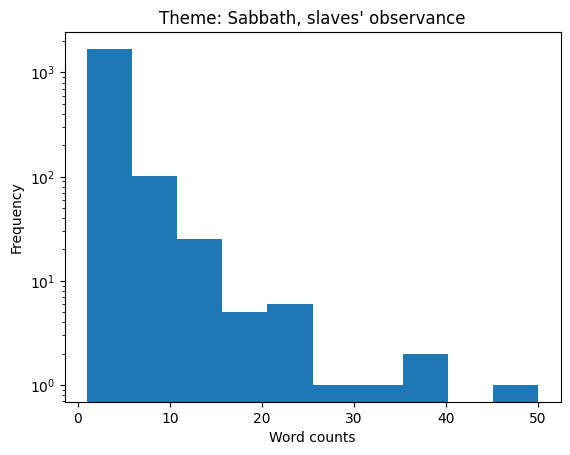

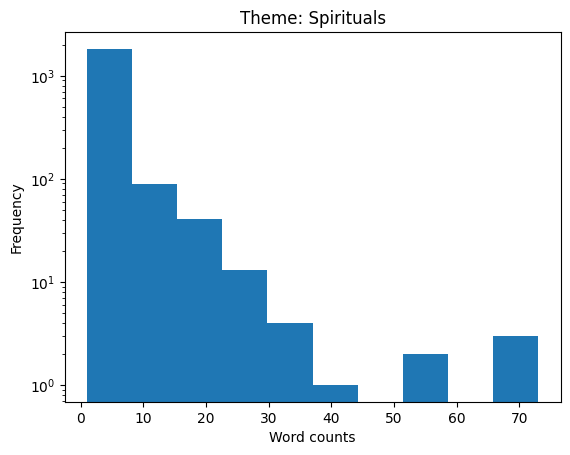

In [134]:
# plot spread of word counts
import matplotlib.pyplot as plt


for i in range(len(clear_theme_names)):
    theme_name = clear_theme_names[i]
    counts = thematic_word_counts[i]
    sorted_word_counts = sorted(list(counts.values()), reverse=True)
    #plot hist
    # x = freq of counts ()
    fig, ax = plt.subplots()
    ax.hist(sorted_word_counts, log=True)
    ax.set_title(f"Theme: {theme_name}")
    ax.set_xlabel("Word counts")
    ax.set_ylabel("Frequency")
    plt.show()


/var/folders/d4/7ym0w0x148n9lkl4zkqgqq9c0000gp/T/ipykernel_22214/2771582464.py:14: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set(xlim=(0, 5000), ylim=(0, 10**3))
/var/folders/d4/7ym0w0x148n9lkl4zkqgqq9c0000gp/T/ipykernel_22214/2771582464.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set(xlim=(0, 5000), ylim=(0, 10**3))


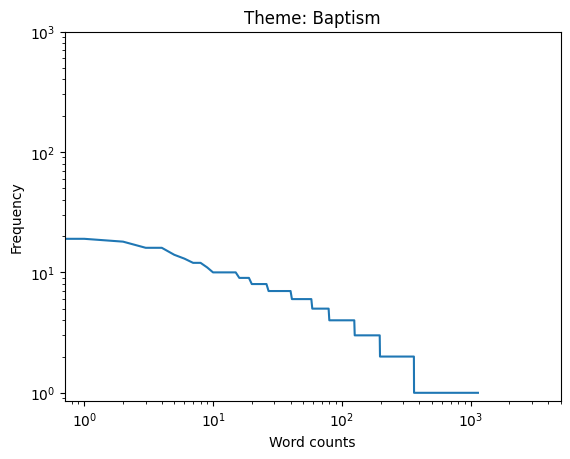

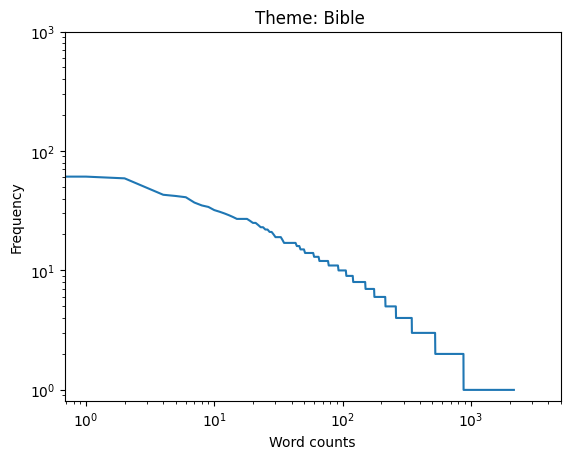

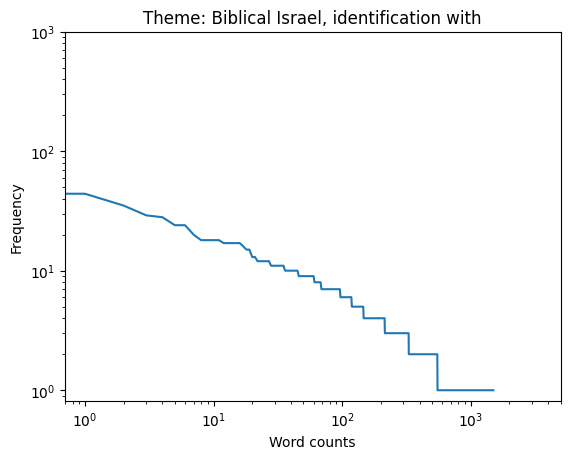

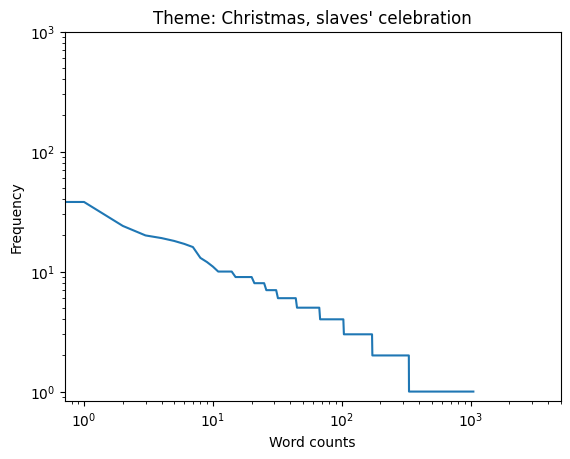

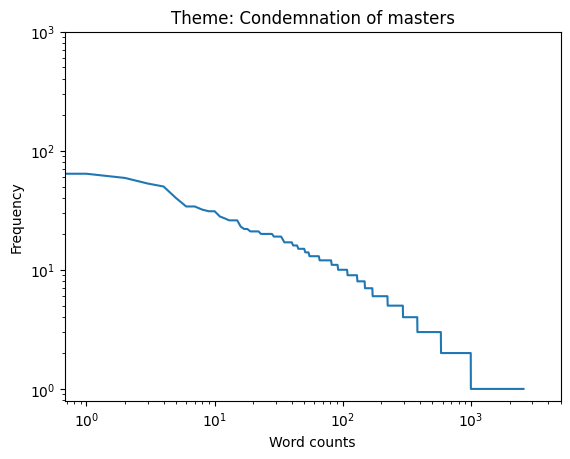

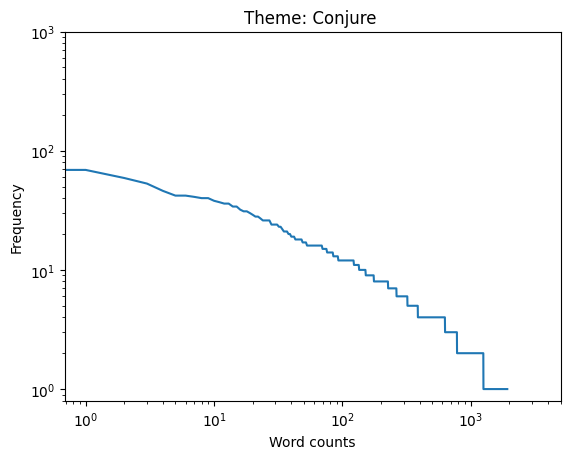

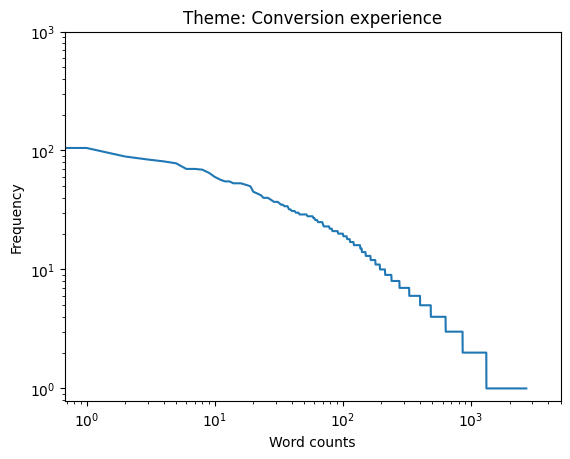

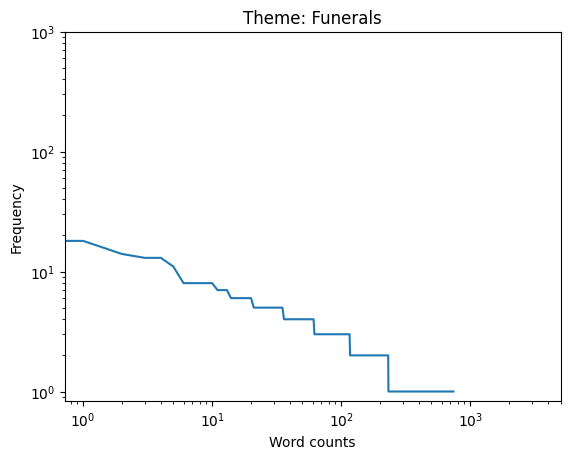

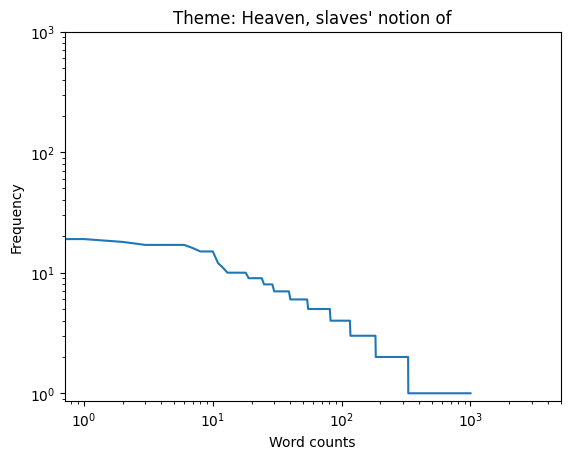

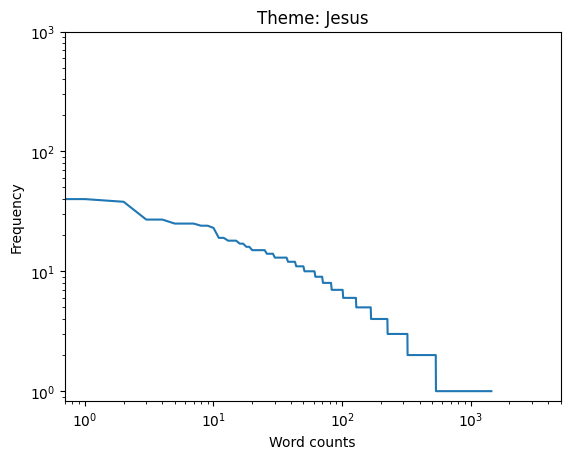

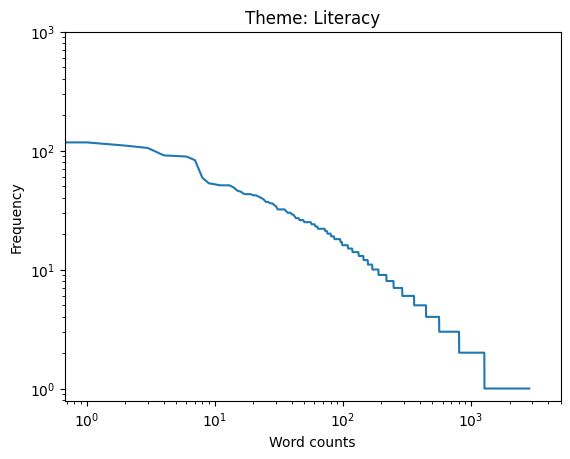

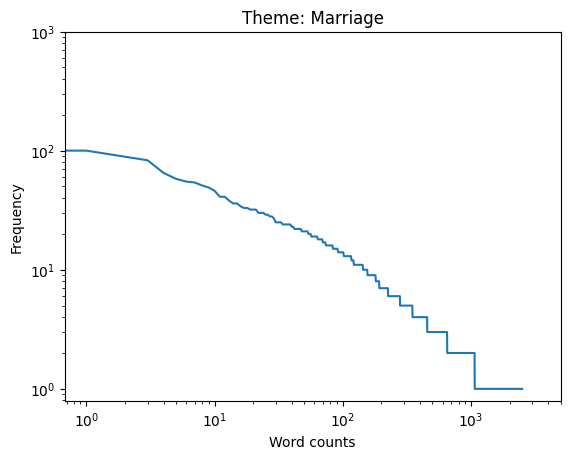

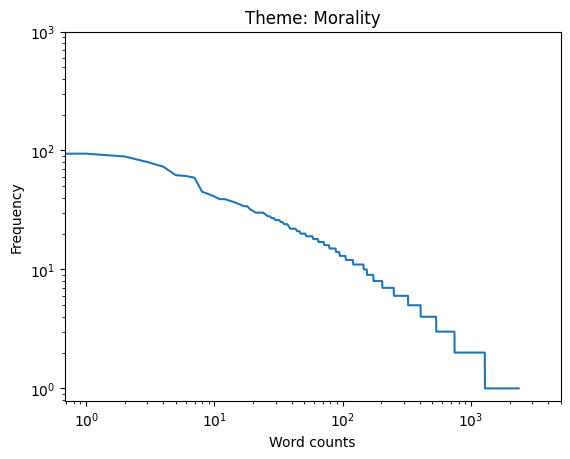

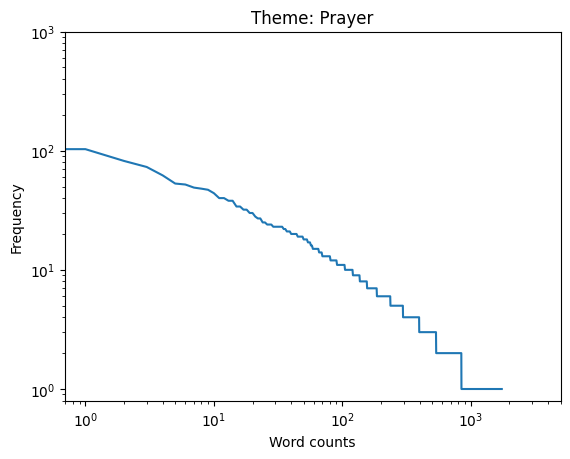

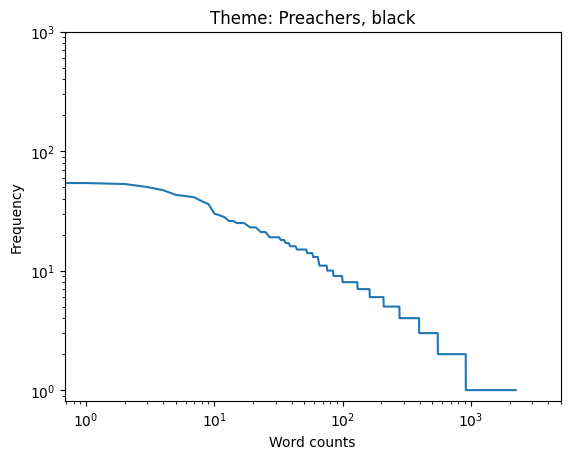

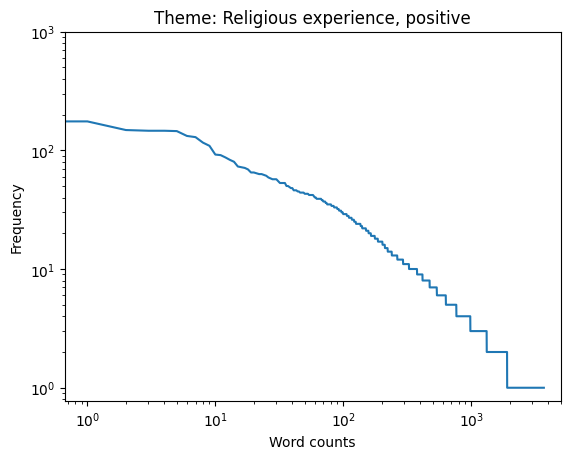

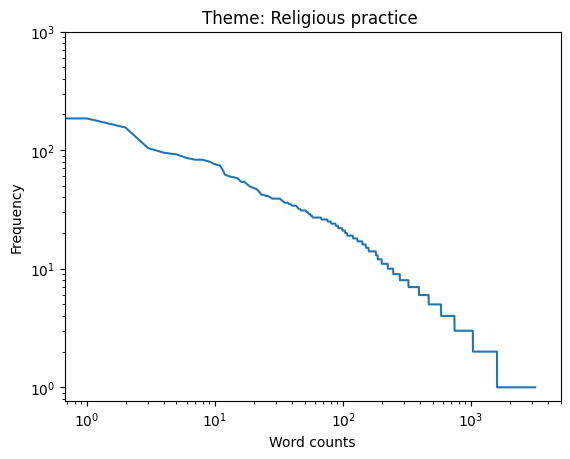

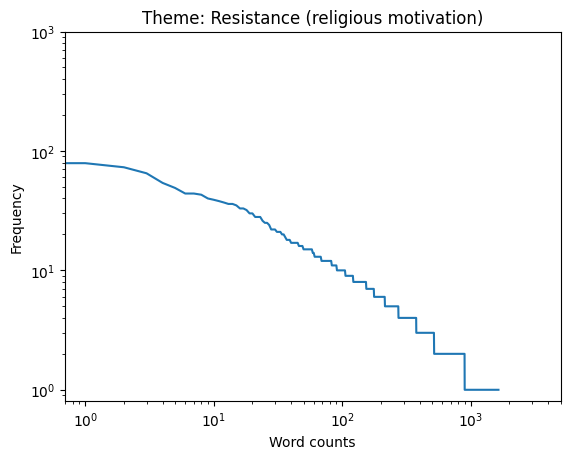

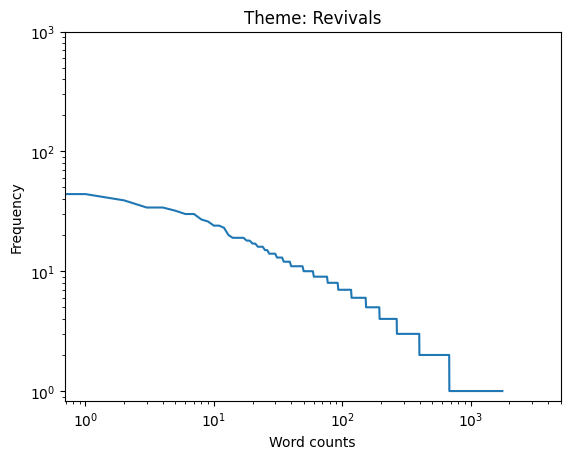

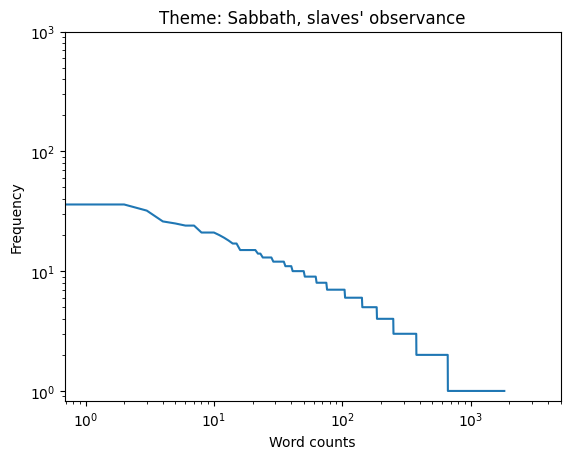

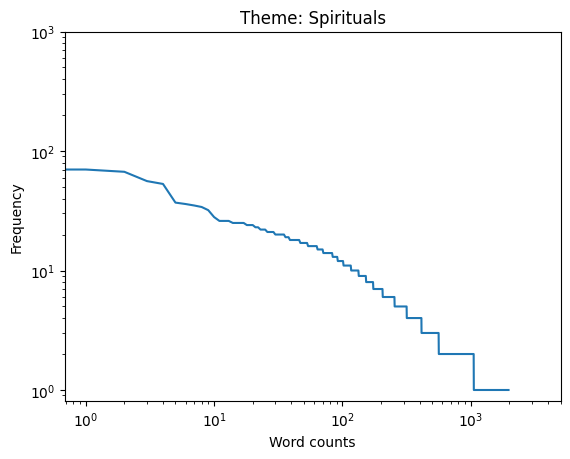

In [135]:
# plot 
import matplotlib.pyplot as plt

for i in range(len(theme_names)):
    theme_name = clear_theme_names[i]
    counts = thematic_word_counts[i]
    sorted_word_counts = sorted(list(counts.values()), reverse=True)

    fig, ax = plt.subplots()
    ax.loglog(sorted_word_counts)
    ax.set_title(f"Theme: {theme_name}")
    ax.set_xlabel("Word counts")
    ax.set_ylabel("Frequency")
    ax.set(xlim=(0, 5000), ylim=(0, 10**3))
    plt.show()


### Theme Classifier

In [72]:
classifier_df = new_df.copy()
classifier_df

,theme,title,year,text
0,Baptism,Narrative of Henry Box Brown,1849,slavery is dissolved. The slave's wife is ...
1,Baptism,Biography of an American Bondman,"1856, c1855","Haskell, the overseer, experien..."
2,Baptism,Memoir of Mrs. Chloe Spear,1832,"herself entirely alone, she fell on her ..."
3,Baptism,Life of George Henry,1894,to bind all that called upon the name of...
4,Baptism,Twenty-Eight Years a Slave,1909,But now I thought that if my master would...
...,...,...,...,...
383,Spirituals,Reminiscences of Isaac and Sukey,1907,Sukey Bat Moore on the Art of Flying. ...
384,Spirituals,Uncle Johnson,1860,charm. They would come forth as spontane...
385,Spirituals,Days of Bondage,1883,on Tuesday morning--this was Sunday nigh...
386,Spirituals,The Kidnapped and the Ransomed,1856,"you to go to the gin-house, and get Ann ..."


In [73]:
# tokenize individual texts
from nlp_utils import lemmatize_words, remove_stopwords

extra_stopwords = ["" , " ", "\n", "'s"]


data = classifier_df["text"]
tokenized_texts=[]
for text in data:
    base_text = remove_stopwords(text, extra_stopwords)
    lemmatized = lemmatize_words(base_text)
    tokenized_texts.append(lemmatized)
classifier_df["tokenized_texts"] = tokenized_texts
classifier_df

,theme,title,year,text,tokenized_texts
0,Baptism,Narrative of Henry Box Brown,1849,slavery is dissolved. The slave's wife is ...,"[slavery, dissolved, slave, wife, master, may,..."
1,Baptism,Biography of an American Bondman,"1856, c1855","Haskell, the overseer, experien...","[haskell, overseer, experienced, religion, tim..."
2,Baptism,Memoir of Mrs. Chloe Spear,1832,"herself entirely alone, she fell on her ...","[entirely, alone, fell, knee, broken, accent, ..."
3,Baptism,Life of George Henry,1894,to bind all that called upon the name of...,"[bind, called, upon, name, lord, bring, jerusa..."
4,Baptism,Twenty-Eight Years a Slave,1909,But now I thought that if my master would...,"[thought, master, would, come, jesus, could, s..."
...,...,...,...,...,...
383,Spirituals,Reminiscences of Isaac and Sukey,1907,Sukey Bat Moore on the Art of Flying. ...,"[sukey, bat, moore, art, flying, one, summer, ..."
384,Spirituals,Uncle Johnson,1860,charm. They would come forth as spontane...,"[charm, would, come, forth, spontaneously, nat..."
385,Spirituals,Days of Bondage,1883,on Tuesday morning--this was Sunday nigh...,"[tuesday, morning, sunday, night, house, five,..."
386,Spirituals,The Kidnapped and the Ransomed,1856,"you to go to the gin-house, and get Ann ...","[go, gin-house, get, ann, eliza, give, one, go..."


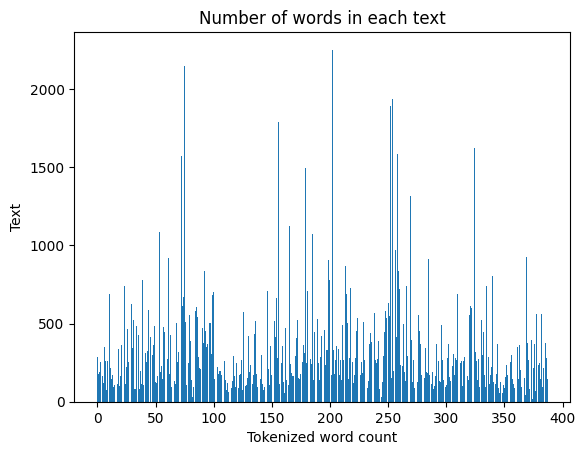

Min:0
Max:2250


In [142]:
# visual of len of each tokenized text
import matplotlib.pyplot as plt
# plot len of unique words
#x = text ID, y = len(tokenized text)

num_words = [len(words) for words in tokenized_texts]
fig, ax = plt.subplots()
ax.bar(range(len(tokenized_texts)),num_words)
ax.set_title("Number of words in each text")
ax.set_ylabel("Text")
ax.set_xlabel("Tokenized word count")
# plt.xticks(rotation = 90)
plt.show()
min_len = min(num_words)
max_len = max (num_words)
print(f"Min:{min_len}")
print(f"Max:{max_len}")

In [ ]:
from utils import is_numeric
# remove question marks and year ranges from year column
single_yr = []
year_iterator = len(classifier_df["year"])
for i in range(year_iterator):
    year = classifier_df["year"][i]
    numeric =  True if is_numeric(year) else False
    if numeric:
        single_yr.append(int(year))
        i += 1
    else:
        built_yr = ""

        year_chars = year
        j = 0
        while j <= len(year_chars):
            char = year_chars[j]
            numeric =  True if is_numeric(char) else False
            is_circa = True if year_chars[0] == "c" else False
            if is_circa and j == 0:
                #remove c and start checks
                j += 1       
            elif numeric:
                built_yr += char
                j += 1
            else:
                single_yr.append(int(built_yr))
                break

                # is_numeric =  True if is_numeric(char) else False
     

In [133]:
# get word counts for each text
from collections import Counter

text_word_counts = []
for tokenized_text in tokenized_texts:
    text_word_counts.append(Counter(tokenized_text))

# calculate freq from counts
text_lens = [len(text) for text in tokenized_texts]
print(text_lens)
# total_len = len(text)

[286, 176, 188, 251, 163, 118, 351, 262, 73, 260, 689, 218, 143, 174, 96, 110, 92, 111, 338, 101, 162, 361, 406, 738, 115, 223, 463, 254, 105, 627, 346, 523, 81, 82, 487, 425, 82, 196, 113, 778, 106, 311, 251, 323, 587, 0, 414, 298, 365, 486, 129, 122, 167, 1086, 192, 231, 146, 479, 448, 174, 273, 916, 175, 425, 92, 719, 133, 111, 502, 254, 315, 861, 1571, 609, 671, 2145, 510, 109, 249, 556, 386, 139, 30, 96, 583, 604, 539, 288, 217, 212, 473, 374, 835, 450, 350, 367, 506, 506, 303, 685, 699, 148, 391, 225, 177, 196, 196, 174, 469, 260, 137, 74, 120, 59, 124, 86, 131, 292, 162, 93, 250, 87, 168, 178, 267, 78, 571, 98, 104, 150, 419, 190, 233, 113, 171, 435, 514, 177, 93, 218, 143, 301, 115, 74, 96, 161, 709, 212, 110, 353, 173, 147, 517, 416, 661, 278, 1789, 112, 248, 359, 127, 56, 473, 138, 105, 1126, 242, 181, 164, 167, 290, 409, 524, 149, 144, 180, 255, 360, 314, 1496, 249, 705, 432, 272, 240, 1075, 140, 447, 235, 528, 250, 140, 289, 418, 348, 459, 237, 328, 328, 907, 781, 168, 2250

In [110]:
labels = classifier_df["theme"].to_list()
data = pd.DataFrame({"tokenized_texts":classifier_df["tokenized_texts"], "year":single_yr})
data["word_counts"] = text_word_counts
data

,tokenized_texts,year,word_counts
0,"[slavery, dissolved, slave, wife, master, may,...",1849,"{'slavery': 2, 'dissolved': 1, 'slave': 15, 'w..."
1,"[haskell, overseer, experienced, religion, tim...",1856,"{'haskell': 2, 'overseer': 4, 'experienced': 1..."
2,"[entirely, alone, fell, knee, broken, accent, ...",1832,"{'entirely': 1, 'alone': 1, 'fell': 1, 'knee':..."
3,"[bind, called, upon, name, lord, bring, jerusa...",1894,"{'bind': 1, 'called': 1, 'upon': 2, 'name': 1,..."
4,"[thought, master, would, come, jesus, could, s...",1909,"{'thought': 1, 'master': 4, 'would': 1, 'come'..."
...,...,...,...
383,"[sukey, bat, moore, art, flying, one, summer, ...",1907,"{'sukey': 3, 'bat': 1, 'moore': 1, 'art': 1, '..."
384,"[charm, would, come, forth, spontaneously, nat...",1860,"{'charm': 1, 'would': 2, 'come': 1, 'forth': 1..."
385,"[tuesday, morning, sunday, night, house, five,...",1883,"{'tuesday': 1, 'morning': 1, 'sunday': 2, 'nig..."
386,"[go, gin-house, get, ann, eliza, give, one, go...",1856,"{'go': 1, 'gin-house': 2, 'get': 1, 'ann': 2, ..."


In [113]:
# build a feature extractor

def word_extractor(words):
    """
    Given a list of words, return a dict with each word as a key and whether that word is in the text (boolean) as a value.
    Input:
        [words]
    Output:
        {word: True}
    """
    word_words = set(words)
    features = {}
    for word in words:
        features['contains({})'.format(word)] = (word in word_words)
    return features

def combine_dicts(lists):
    """
    Combine n dictionaries.
    Input:
        [{dicts}],[{dicts}]; lists (of dicts)
    Output:
        [{combined dicts}]; list of combined dicts
    """

    combo_dicts = []
    first_dictionary_len = len(lists[0])
    for i in range(first_dictionary_len):
        temp_dict = {}
        for dictionary in lists:
            current_dict = dictionary[i]
            add_keys = list(current_dict.keys())
            add_values = list(current_dict.values())
        
            for key, value in zip(add_keys, add_values):
                temp_dict[key] = value

        combo_dicts.append(temp_dict) 
    return combo_dicts

def label_features_sets(feature_dicts,labels):
    """
    Pair feature sets with a label for training and testing.
    Input:
        [feature dictionaries]
        [corresponsing labels]
    Output:
        [(feature_dict,label)]; list of tuples
    """
    return [(feature_dict, label) for feature_dict, label in zip(feature_dicts,labels)]


In [114]:
yr_as_list = data["year"].tolist() 
words_as_list = data["tokenized_texts"].tolist()
text_freq_dicts = data["word_counts"].tolist()

# tokenized_text -> dicts
word_dicts = []
for each in words_as_list:
    word_dicts.append(word_extractor(each))

# years -> dicts
year_dicts = []
for year in yr_as_list:
    year_dicts.append({"year":year})

# calculated weighted word counts

# combine dicts
to_combine = [word_dicts,year_dicts,text_freq_dicts]
feauture_dicts = combine_dicts(to_combine)

In [118]:
# test,train,validation split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feauture_dicts, labels, test_size=0.3)

In [119]:
# classifier
from nltk.classify import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(label_features_sets(x_train,y_train))

In [120]:
from nltk.classify import accuracy
# print(classifier.classify(x_test[2]))
# print(y_test[2])
print(accuracy(classifier, label_features_sets(x_test,y_test)))



0.06837606837606838


In [129]:
classifier.show_most_informative_features(5)
#TODO: add in word counts as another feature

Most Informative Features
     contains(christmas) = True           Christ : Religi =     19.8 : 1.0
     contains(different) = True           Christ : Religi =     19.8 : 1.0
               different = 1              Christ : Religi =     17.0 : 1.0
          contains(fool) = True           Conjur : Religi =     16.5 : 1.0
      contains(regarded) = True           Christ : Religi =     15.4 : 1.0


This naive bayes model is only 6.8% accuurate.

features:
- tokenized text
- word frequency 
- year the text was published